In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define paths to your data files
no_tumor_path = 'bt_no1'
tumor_path = 'bt_yes1'

# Function to load images from a directory
def load_images_from_dir(path, label):
    images = []
    labels = []
    for img_file in os.listdir(path):
        img = load_img(os.path.join(path, img_file), target_size=(img_width, img_height))
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return images, labels

# Assuming img_width and img_height are defined (e.g., 128x128 pixels)
img_width, img_height = 128, 128

# Load images and labels
no_tumor_images, no_tumor_labels = load_images_from_dir(no_tumor_path, 0)
tumor_images, tumor_labels = load_images_from_dir(tumor_path, 1)

# Convert lists to numpy arrays
X = np.array(no_tumor_images + tumor_images)
y = np.array(no_tumor_labels + tumor_labels)

# Normalize pixel values to range [0, 1]
X = X / 255.0

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 output classes: no tumor and tumor
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 485ms/step - accuracy: 0.4628 - loss: 0.9864 - val_accuracy: 0.8039 - val_loss: 0.5693
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 387ms/step - accuracy: 0.7327 - loss: 0.5696 - val_accuracy: 0.8235 - val_loss: 0.4140
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 440ms/step - accuracy: 0.7381 - loss: 0.5321 - val_accuracy: 0.8235 - val_loss: 0.4133
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 395ms/step - accuracy: 0.8058 - loss: 0.4962 - val_accuracy: 0.8235 - val_loss: 0.4063
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 406ms/step - accuracy: 0.8064 - loss: 0.4572 - val_accuracy: 0.8824 - val_loss: 0.3414
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 390ms/step - accuracy: 0.8545 - loss: 0.3951 - val_accuracy: 0.8824 - val_loss: 0.3495
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 437ms/step - accuracy: 0.8372 - loss: 0.3915 - val_accuracy: 0.8824 - val_loss: 0.3193
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 409ms/step - accuracy: 0.8351 - loss: 0.3427 - val_accuracy: 0.8824 - val_loss:

2/2 - 0s - 131ms/step - accuracy: 0.8824 - loss: 0.6926
Test accuracy: 0.8823529481887817


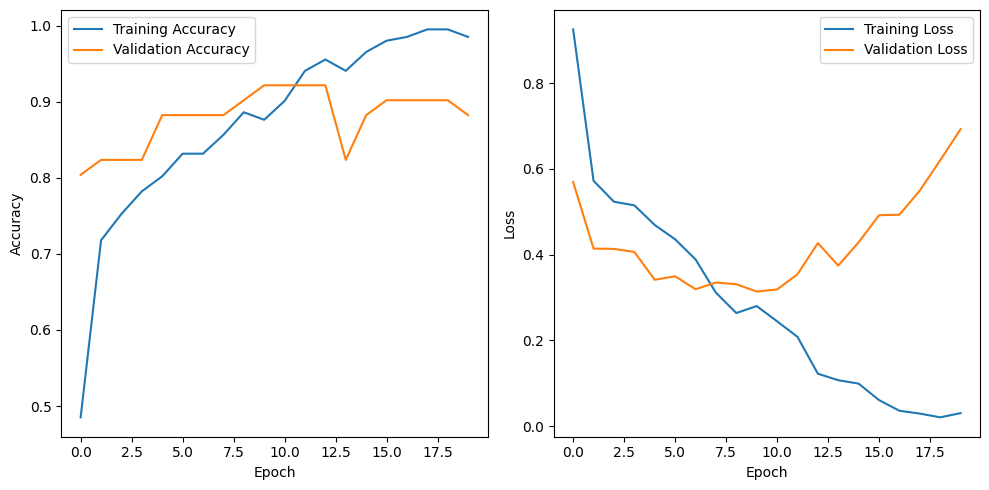

In [5]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot training history
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [6]:
# Assuming you have already trained your model and evaluated it
predictions = model.predict(X_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step


In [7]:
# Get predicted labels (index of the highest probability in predictions)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels (index of 1 in one-hot encoded y_test)
true_labels = np.argmax(y_test, axis=1)

# Find indices where predictions match true labels (correct predictions)
correct_indices = np.where(predicted_labels == true_labels)[0]


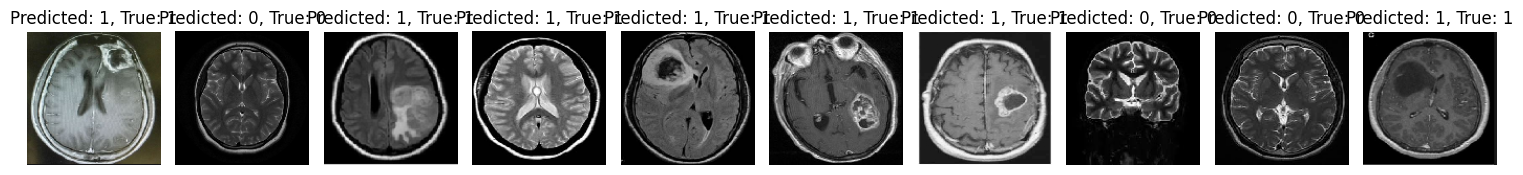

In [9]:
# Number of images to display (e.g., 5)
num_images = 10

plt.figure(figsize=(15, 7))
for i, idx in enumerate(correct_indices[:num_images]):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f'Predicted: {predicted_labels[idx]}, True: {true_labels[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [10]:
from sklearn.metrics import confusion_matrix, classification_report

# Get predicted labels (index of the highest probability in predictions)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels (index of 1 in one-hot encoded y_test)
true_labels = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(cm)

# Compute classification report
report = classification_report(true_labels, predicted_labels)
print('\nClassification Report:')
print(report)


Confusion Matrix:
[[15  5]
 [ 1 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.75      0.83        20
           1       0.86      0.97      0.91        31

    accuracy                           0.88        51
   macro avg       0.90      0.86      0.87        51
weighted avg       0.89      0.88      0.88        51



In [11]:
# Save the entire model to a HDF5 file
model.save('brain_tumor_classifier.h5')

# Optionally, save the model architecture to JSON (if needed)
model_json = model.to_json()
with open('brain_tumor_classifier.json', 'w') as json_file:
    json_file.write(model_json)
